In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

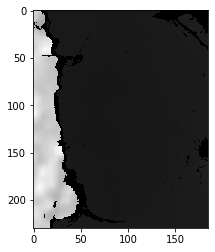

In [27]:
data_path = 'depth_roi_real.png'
img = cv2.imread(data_path, cv2.IMREAD_ANYDEPTH).astype(np.uint16)
plt.imshow(img, cmap='gray')

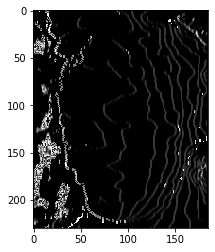

In [28]:
# Note: Try to edge out relevant and prominent features
dx = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
edged_dx = cv2.filter2D(img, -1, dx)

plt.imshow(edged_dx * 300, cmap='gray')

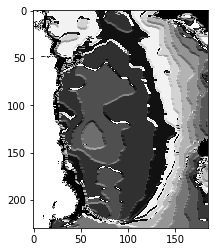

In [29]:
dy = np.array([
    [-1, -1, 11],
    [0, 0, 0],
    [1, 1, 1]
])
edged_dy = cv2.filter2D(img, -1, dy)

plt.imshow(edged_dy * 300, cmap='gray')

/home/filipgrigorov/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


max:  nan
min:  nan


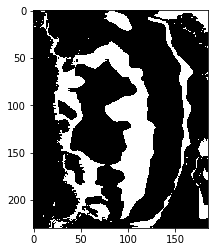

In [30]:
mag = np.sqrt(edged_dx * edged_dx + edged_dy * edged_dy).astype(np.float32)
mag /= mag
plt.imshow(mag, cmap='gray')

print('max: ', np.max(mag))
print('min: ', np.min(mag))

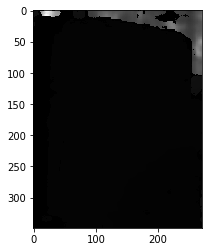

In [31]:
spoof = cv2.imread('depth_roi_spoof.png', cv2.IMREAD_ANYDEPTH).astype(np.uint16)
plt.imshow(spoof, cmap='gray')

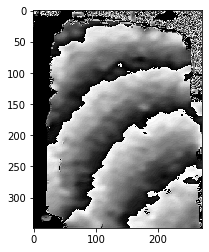

In [32]:
dx = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

dy = np.array([
    [-1, -1, 1],
    [0, 0, 0],
    [1, 1, 1]
])

spoof = cv2.filter2D(spoof, -1, dy)

plt.imshow(spoof * 800, cmap='gray')

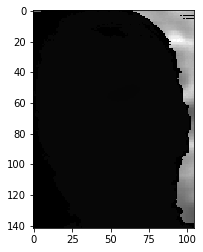

In [33]:
real = cv2.imread('depth_roi_spoof_1.png', cv2.IMREAD_ANYDEPTH).astype(np.uint16)
plt.imshow(real, cmap='gray')

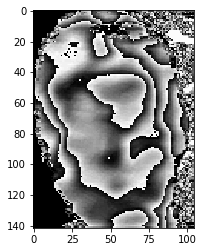

In [34]:
dx = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

dy = np.array([
    [-1, -1, 1],
    [0, 0, 0],
    [1, 1, 1]
])

real = cv2.filter2D(real, -1, dy)

plt.imshow(real * 1000, cmap='gray')

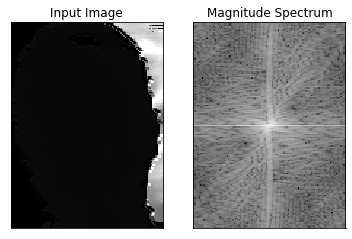

In [40]:
#FFT of the real versus spoof
fft_tl = np.fft.fft2(real)
fft_centered = np.fft.fftshift(fft_tl)
mag = 20 * np.log(np.abs(fft_centered))

plt.subplot(121),plt.imshow(real, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(mag, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

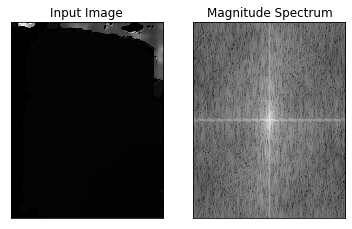

In [42]:
fft_tl = np.fft.fft2(spoof)
fft_centered = np.fft.fftshift(fft_tl)
mag = 20 * np.log(np.abs(fft_centered))

plt.subplot(121),plt.imshow(spoof, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(mag, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()